In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import math

def importerDonneesVehicule(numeroVehicule):
    path = 'donnees_TD1/vehicle-%d.csv' %numeroVehicule
    data = pd.read_csv(path, names = ["Temps","CoordonneeX","CoordonneeY","CoordonneeLon","CoordonneeLat"])
    return data

idVehicule = [4,27,43,61,77,94,109,123,126,161,201,203,219,237,247]
vehicule   = []

for id in idVehicule:
    vehicule.append(importerDonneesVehicule(id))

In [2]:
def distanceParcourue(donneesVehicule):
    coordonneInitialeX = donneesVehicule.CoordonneeLon[0]
    coordonneInitialeY = donneesVehicule.CoordonneeLat[0]
    distance = 0
    donneesVehicule['DistanceParcourue'] = distance
    
    for i in range(len(donneesVehicule)):
        distance = math.sqrt((donneesVehicule.CoordonneeLon[i] - 0)**2 
                             + (donneesVehicule.CoordonneeLat[i]- 0)**2)
        donneesVehicule.loc[i,('DistanceParcourue')] = distance

In [3]:
for i in range(len(idVehicule)):
    distanceParcourue(vehicule[i])

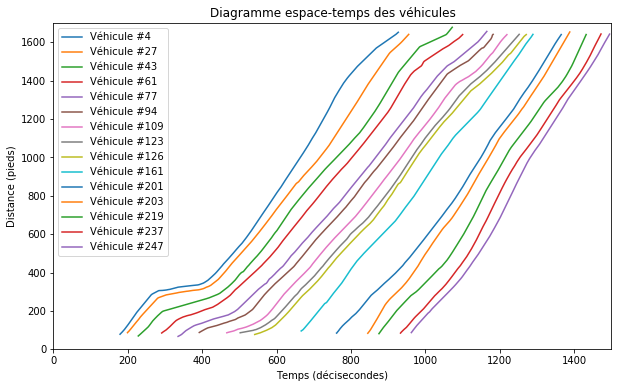

In [4]:
plt.figure(figsize=(10,6))

for i in range(len(idVehicule)):
    plt.plot(vehicule[i].Temps, vehicule[i].DistanceParcourue,  label = 'Véhicule #%d'%idVehicule[i])

plt.xlabel('Temps (décisecondes)')
plt.ylabel('Distance (pieds)')
plt.title('Diagramme espace-temps des véhicules')
plt.legend(loc='best')
plt.axis([0, 1500, 0, 1700])
# plt.savefig('Donnees_produites/Figures/diagramme_espace-temps.eps', format='eps')
plt.show()

In [5]:
# Exercice 2
def trouverTempsPassage(donneesVehicule, distance):
    indexTemps = [index for index, value in enumerate(donneesVehicule.DistanceParcourue) if value >= distance][0]
    return donneesVehicule.Temps[indexTemps]

tempsDePassage = []

for i in range(len(idVehicule)):
    tempsDePassage.append(trouverTempsPassage(vehicule[i], 600))

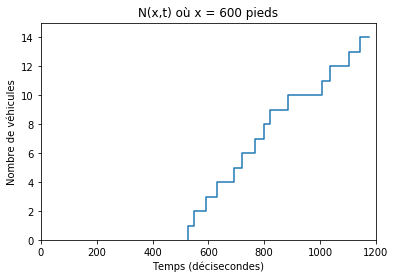

In [6]:
N = np.arange(0, 15, 1)

plt.step(tempsDePassage,N)
plt.xlabel('Temps (décisecondes)')
plt.ylabel('Nombre de véhicules')
plt.title('N(x,t) où x = 600 pieds')
plt.axis([0, 1200, 0, 15])
# plt.savefig('Donnees_produites/Figures/diagramme_N_x_600.eps', format='eps')
plt.show()

In [7]:
def trouverDistancePassage(donneesVehicule, temps):
    try:
        indexDistance = [index for index, value in enumerate(donneesVehicule.Temps) if value >= temps][0]
    except IndexError:
        return None
    return donneesVehicule.DistanceParcourue[indexDistance]

distanceDePassage = []

for i in range(len(idVehicule)):
    distance = trouverDistancePassage(vehicule[i], 1000)
    if(distance == None):
        distanceDePassage.append(1800) # Valeur arbitraire à ignorer
    else:
        distanceDePassage.append(distance)

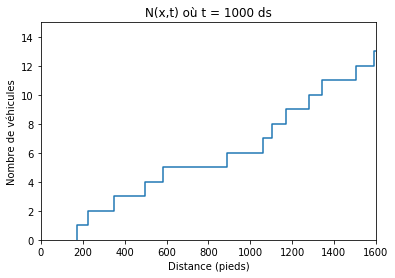

In [8]:
N = np.arange(0, 15, 1)
distanceDePassageInverse = list(reversed((distanceDePassage)))

plt.step(distanceDePassageInverse,N)
plt.xlabel('Distance (pieds)')
plt.ylabel('Nombre de véhicules')
plt.title('N(x,t) où t = 1000 ds')
plt.axis([0, 1600, 0, 15])
# plt.savefig('Donnees_produites/Figures/diagramme_N_t_100.eps', format='eps')
plt.show()

In [9]:
# Temps inter-vehiculaire moyen (à x = 600 pieds)
h = []

for i in range(len(idVehicule) - 1):
    h.append((tempsDePassage[i+1] - tempsDePassage[i])/10)

avgTIV = np.average(h)
print("%.2f s" %avgTIV)

4.65 s


In [10]:
# Débit (à x = 600 pieds)
q = 1/(avgTIV/3600)
print("%.2f véh/h" %q)

774.19 véh/h


In [11]:
# Distance inter-vehiculaire moyenne (à t = 1000 ds)
s = []

for i in range(len(idVehicule) - 1):
    s.append((distanceDePassageInverse[i+1] - distanceDePassageInverse[i]))

avgDIV = np.average(s)
print("%.2f pieds" %avgDIV)

116.15 pieds


In [12]:
# Densité (à t = 1000 ds)
k = 1/(avgDIV/5280)
print("%.4f véh/mile" %k)

45.4589 véh/mile


In [13]:
# Exercice 3
aire = (1600-100)*(150-10)
distanceTotale = 15*(1600-100) # L'ensemble des véhicules a parcourue la distance de la zone A

q = distanceTotale/(aire/3600) # distanceTotale en pieds et aire en pieds/sec
print("%.2f véh/h" %q)

385.71 véh/h


In [14]:
tempsTotal = 0

for i in range(len(idVehicule)):
    indexTemps1 = [index for index, value in enumerate(vehicule[i].DistanceParcourue) if value >= 100][0]
    indexTemps2 = [index for index, value in enumerate(vehicule[i].DistanceParcourue) if value <= 1600][-1]
    tempsTotal = tempsTotal + vehicule[i].Temps[indexTemps2]-vehicule[i].Temps[indexTemps1]

k = (tempsTotal/10)/(aire/5280) # tempsTotal en décisecondes et aire en pieds/sec
print("%.4f véh/mile" %k)

24.8059 véh/mile


In [15]:
v = (distanceTotale/5820)/(tempsTotal/36000) # distanceTotale en pieds et tempsTotal en décisecondes
print("%.2f mph" %v)

14.11 mph


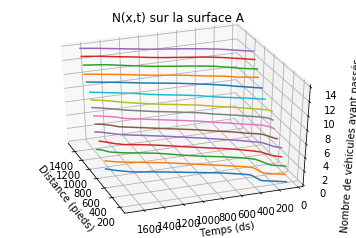

In [16]:
import mpl_toolkits.mplot3d.axes3d as axes3d

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for i in range(len(vehicule)):
    ax.plot(vehicule[i].Temps.values, vehicule[i].DistanceParcourue.values, i*np.ones_like(vehicule[i].Temps.values))
ax.view_init(35,160)
ax.set_xlabel('Distance (pieds)')
ax.set_ylabel('Temps (ds)')
ax.set_zlabel('Nombre de véhicules ayant passés')
plt.title('N(x,t) sur la surface A')
# plt.savefig('Donnees_produites/Figures/diagramme_N_x_t.eps', format='eps')
plt.show()